In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from newKNN import *

## Import all the necessary sets

In [2]:
df= pd.read_csv('training.csv')
validation=pd.read_csv('validation.csv')


In [3]:
df.columns

Index(['age', 'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'gender_F', 'gender_M', 'gender_XNA',
       'owns_car_Y', 'owns_house_Y', 'occupation_type_Accountants',
       'occupation_type_Cleaning staff', 'occupation_type_Cooking staff',
       'occupation_type_Core staff', 'occupation_type_Drivers',
       'occupation_type_HR staff', 'occupation_type_High skill tech staff',
       'occupation_type_IT staff', 'occupation_type_Laborers',
       'occupation_type_Low-skill Laborers', 'occupation_type_Managers',
       'occupation_type_Medicine staff',
       'occupation_type_Private service staff',
       'occupation_type_Realty agents', 'occupation_type_Sales staff',
       'occupation_type_Secretaries', 'occupation_type_Security staff',
       'occupation_type_Unknown', 'occupation_typ

Convert the dataframes into arrays because the algorithms are written for arrays

In [4]:
training = [[i for i in df.iloc[j]] for j in range(len(df))]
validation = [[i for i in validation.iloc[j]] for j in range(len(validation))]


Create a function that checks if the predicted value is the same as the true value

In [5]:
def checker(example, output):
    if example[-1]==output:
        return True
    else:
        return False
    

In [6]:
#calculates if it is correct for K=1,...,max_value inclusive

def actual_knn(training_set, example, max_value):
    
    #first we find the euclidean distance from all points
    sorted_distance = nearest_neighbours(training_set, example)
    
    prediction = []
    for k in range(1,max_value+1):
        
        #for each value k, calculate the most common label for the closest k
 
        output = knn(training_set , sorted_distance, k)

        #check if this aligns with the true value
        #appends this to the prediction
        prediction.append(checker(example,output))
        
    return prediction
        
        

In [7]:
def total_knn(training_set, validation_set, max_value):
    all_predictions = []
    counter=0
    
    for i in validation_set:
        counter+=1
        print(counter)
        prediction_array = actual_knn(training_set, i , max_value)
        all_predictions.append(prediction_array)
        
    prediction_matrix = np.array(all_predictions)
    
    return np.transpose(all_predictions)



In [8]:
def evaluation(all_predictions):
    accuracy = []
    length = len(all_predictions[0])
    
    for i in all_predictions:
        true = i.sum()
        accuracy_score = true / length
        accuracy.append(accuracy_score)
        
    return accuracy
        

In [9]:
#plots accuracy against k value
def plot_evaluation(accuracy):
    x = np.arange(1,len(accuracy)+1)
    
    plt.figure()
    plt.title('Accuracy per K value')
    plt.plot(x,accuracy)
    plt.xlabel('K Value')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.show()
    
    return plt.figure()

# Run the following if you dare

In [10]:
#predictions = total_knn(training, validation, 500)

In [11]:
#np.save('predictions.npy',predictions)

In [12]:
q = np.load('predictions.npy')

In [13]:
evaluate = evaluation(q)

In [14]:
evaluate

[0.9661736711085078,
 0.9661736711085078,
 0.9710060038072924,
 0.9710060038072924,
 0.9710060038072924,
 0.9723239127251427,
 0.9714453067799093,
 0.9724703470493483,
 0.9714453067799093,
 0.971884609752526,
 0.9701273978620588,
 0.9707131351588812,
 0.9702738321862645,
 0.9702738321862645,
 0.9695416605652365,
 0.9695416605652365,
 0.9691023575926198,
 0.9693952262410309,
 0.9686630546200029,
 0.9692487919168253,
 0.967198711377947,
 0.9673451457021526,
 0.9667594084053303,
 0.967198711377947,
 0.9666129740811246,
 0.9667594084053303,
 0.9657343681358911,
 0.9660272367843022,
 0.9655879338116855,
 0.9657343681358911,
 0.9652950651632742,
 0.9655879338116855,
 0.9644164592180408,
 0.9648557621906575,
 0.9642700248938351,
 0.9645628935422463,
 0.963244984624396,
 0.9636842875970127,
 0.9628056816517792,
 0.9628056816517792,
 0.9626592473275736,
 0.9626592473275736,
 0.96178064138234,
 0.9620735100307513,
 0.9616342070581344,
 0.96178064138234,
 0.9614877727339288,
 0.9619270757065456,


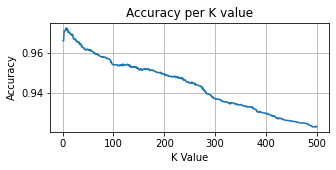

In [15]:

x = np.arange(1,len(evaluate)+1)
    
plt.figure(figsize=(5,2))
plt.title('Accuracy per K value')
plt.plot(x,evaluate)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid()
plt.savefig('KNN.png')
plt.show()

In [16]:
np.argmax(evaluate)

7

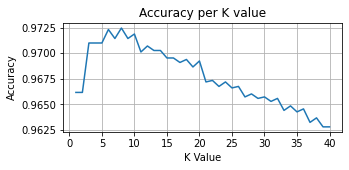

In [22]:
q = evaluate[:40]
x = np.arange(1,len(q)+1)


plt.figure(figsize=(5,2))
plt.title('Accuracy per K value')
plt.plot(x,q)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid()
plt.savefig('K40.png')
plt.show()

In [18]:
q

<Figure size 432x288 with 0 Axes>

In [19]:
q.savefig('k40.png')